In [37]:
import pandas as pd
import numpy as np
np.float = float
np.int = int
np.bool = bool
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [39]:
df = pd.read_csv(r"D:\Study\Power Bi\used_car.csv")


In [5]:
print(df.head())


   make_year  mileage_kmpl  engine_cc fuel_type  owner_count  price_usd  \
0       2001          8.17       4000    Petrol            4    8587.64   
1       2014         17.59       1500    Petrol            4    5943.50   
2       2023         18.09       2500    Diesel            5    9273.58   
3       2009         11.28        800    Petrol            1    6836.24   
4       2005         12.23       1000    Petrol            2    4625.79   

       brand transmission  color service_history  accidents_reported  \
0  Chevrolet       Manual  White            None                   0   
1      Honda       Manual  Black            None                   0   
2        BMW    Automatic  Black            Full                   1   
3    Hyundai       Manual   Blue            Full                   0   
4     Nissan    Automatic    Red            Full                   0   

  insurance_valid  
0              No  
1             Yes  
2             Yes  
3             Yes  
4             Ye

In [6]:
print (df.shape)


(10000, 12)


In [15]:
Brands_count = df['brand'].value_counts()
print(Brands_count)


Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: brand, dtype: int64


In [17]:
avg_Price_per_Brand = df.groupby('brand')['price_usd'].mean().astype(int).sort_values(ascending=False)

print(avg_Price_per_Brand)


brand
Ford          7319
BMW           7314
Volkswagen    7240
Honda         7207
Chevrolet     7182
Hyundai       7156
Toyota        7145
Kia           7097
Nissan        7075
Tesla         7065
Name: price_usd, dtype: int32


In [20]:
years_count = df['make_year'].value_counts().sort_index()

print(years_count)



1995    320
1996    343
1997    354
1998    350
1999    335
2000    329
2001    312
2002    353
2003    313
2004    328
2005    314
2006    349
2007    379
2008    315
2009    370
2010    316
2011    391
2012    327
2013    342
2014    334
2015    346
2016    381
2017    384
2018    338
2019    355
2020    373
2021    333
2022    369
2023    347
Name: make_year, dtype: int64


In [22]:
fuel_counts = df['fuel_type'].value_counts()
print(fuel_counts)

Petrol      4968
Diesel      4058
Electric     974
Name: fuel_type, dtype: int64


In [24]:
avg_fuel_counts = df.groupby('fuel_type') ['price_usd'].mean().round(2).sort_values(ascending=False)

print(avg_fuel_counts)


    

fuel_type
Electric    9839.48
Diesel      6907.74
Petrol      6880.49
Name: price_usd, dtype: float64


In [10]:
transmission = df['transmission'].value_counts()

print("عدد السيارات حسب نوع ناقل الحركة:")
print(transmission)


عدد السيارات حسب نوع ناقل الحركة:
Manual       5985
Automatic    4015
Name: transmission, dtype: int64


In [17]:
avg_transmission = df.groupby('transmission') ['price_usd'].mean().astype(int).sort_values(ascending=False)

print("Average car price by transmission type:")

print(avg_transmission)

Average car price by transmission type:
transmission
Automatic    7189
Manual       7173
Name: price_usd, dtype: int32


In [30]:
features = ['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count','brand', 'fuel_type', 'transmission']

x = df[features]  #Input variables
y = df['price_usd'] #variable target

categorical_features = ['brand', 'fuel_type', 'transmission']
numerical_features  = ['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # خلى الأرقام زي ما هي
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42) #Data partitioning


model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))





MAE: 790.4342575711496
RMSE: 989.4792446449765
R² Score: 0.8769321307516533


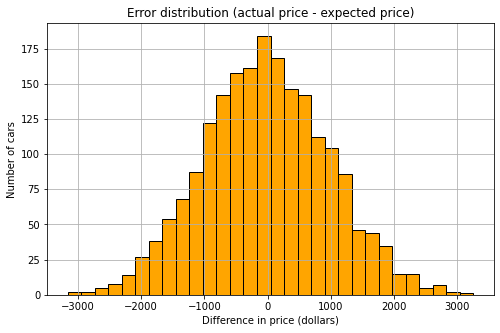

In [36]:
#This shows the distribution of differences (errors) between the actual and expected price:

errors = y_test - y_pred 

plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='orange', edgecolor='black')
plt.title('Error distribution (actual price - expected price)')
plt.xlabel('Difference in price (dollars)')
plt.ylabel('Number of cars')
plt.grid(True)
plt.show()


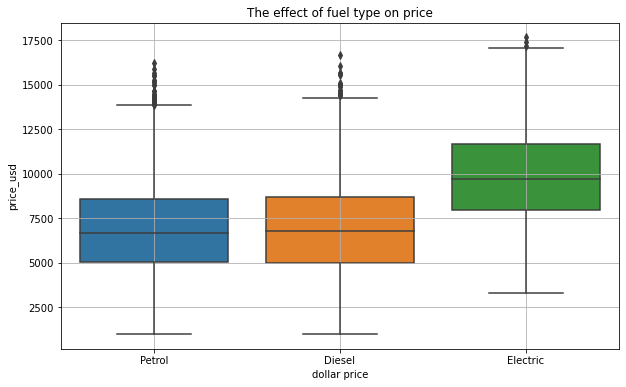

In [40]:
#he effect of fuel type on price

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price_usd', data=df)
plt.title('The effect of fuel type on price')
plt.xlabel('type fuel')
plt.xlabel('dollar price') 
plt.grid(True)
plt.show()


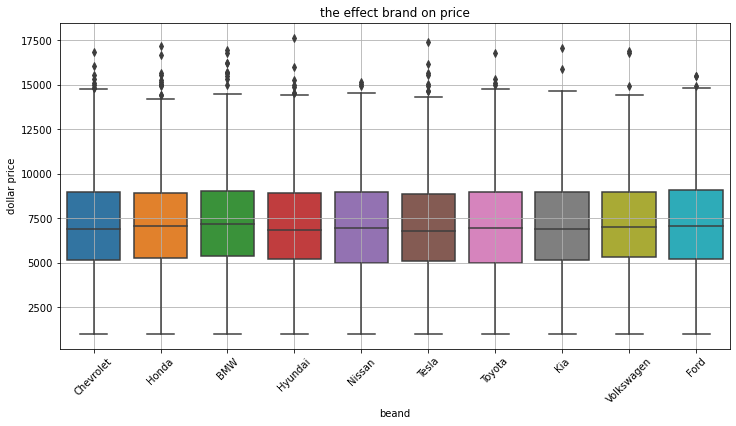

In [42]:
# the effect brand on price

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price_usd', data=df)
plt.title('the effect brand on price')
plt.xlabel('beand')
plt.ylabel('dollar price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
764052